In [1]:
import pandas as pd
import numpy as np
from pandas import Series,DataFrame

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [2]:
df = pd.read_csv(r'C:\Users\vimalson\Downloads\loan.csv')

In [3]:
df.head()

,Interest.Rate,FICO.Score,Loan.Length,Monthly.Income,Loan.Amount
6,15.31,670,36,4891.67,6000
11,19.72,670,36,3575.00,2000
12,14.27,665,36,4250.00,10625
13,21.67,670,60,14166.67,28000
21,21.98,665,36,6666.67,22000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2500 entries, 6 to 2497
Data columns (total 5 columns):
Interest.Rate     2500 non-null float64
FICO.Score        2500 non-null int64
Loan.Length       2500 non-null int64
Monthly.Income    2499 non-null float64
Loan.Amount       2500 non-null int64
dtypes: float64(2), int64(3)
memory usage: 117.2 KB


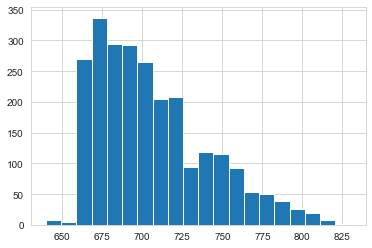

In [5]:
df['FICO.Score'].hist(bins=20)



Text(0, 0.5, 'interest rate in %')

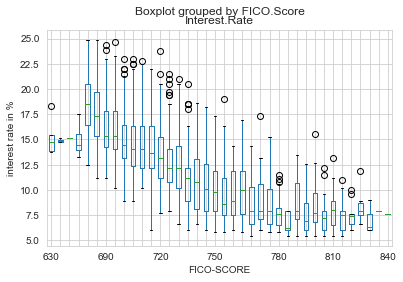

In [6]:
x=df.boxplot('Interest.Rate','FICO.Score')

x.set_xticklabels(['630','','','','','','690','','','','','','720','','','','','','750','','','','','','','780','','','','','','810','','','','','  ','840'])

x.set_xlabel('FICO-SCORE')
x.set_ylabel('interest rate in %')


The BoxPlot proves the interest rate not only depends on fico-score but also on other features




In [7]:
## to find the other features involved we use scatterplot matrix

In [8]:
from pandas.plotting import scatter_matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C25AB82D88>,
      dtype=object)

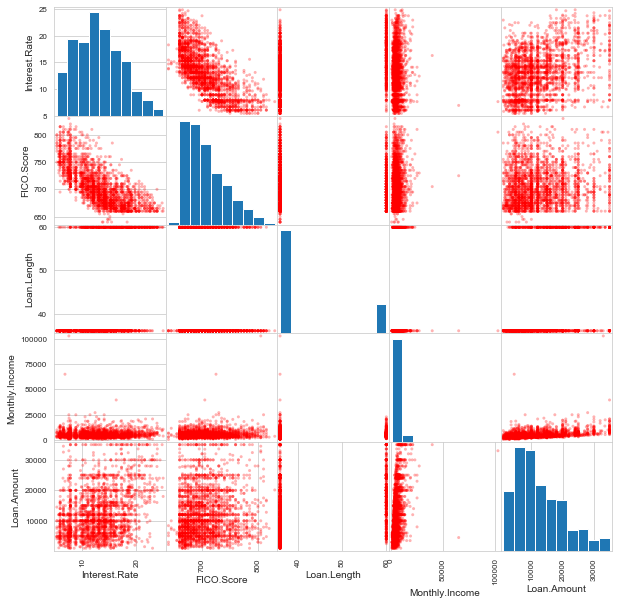

In [9]:
scatter_matrix(df, alpha=0.3, figsize = (10,10),color='red')

In [10]:
import statsmodels.api as sm

In [11]:
df.columns

Index(['Interest.Rate', 'FICO.Score', 'Loan.Length', 'Monthly.Income',
       'Loan.Amount'],
      dtype='object')

In [12]:
interest_rate = df['Interest.Rate']
loan_amt = df['Loan.Amount']
fico_score = df['FICO.Score']

In [13]:
 y= np.matrix(interest_rate).transpose()

In [14]:
x1 = np.matrix(fico_score).transpose()
x2= np.matrix(loan_amt).transpose()

In [15]:
X = np.column_stack([x1,x2])

In [16]:
x3 = sm.add_constant(X)

In [17]:
##using ordinary least squares(OLS) method we predict interest_rate

In [18]:
clf = sm.OLS(y,x3)

In [19]:
clf_fit = clf.fit()

In [20]:
print('the p value is:',clf_fit.pvalues)
print('the R-squared value is:',clf_fit.rsquared)

the p value is: [0.00000000e+000 0.00000000e+000 5.96972978e-203]
the R-squared value is: 0.6566326246493588


In [21]:
##linear regression using sklearn

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [23]:
X1 = df[['Loan.Amount','FICO.Score']]

In [24]:
y1 = df[['Interest.Rate']]

In [25]:
X1_train,X1_test,y1_train,y1_test = train_test_split(X1,y1,test_size=0.2)

In [26]:
model = LinearRegression()

In [27]:
model.fit(X1_train,y1_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [28]:
prediction = model.predict(X1_test)

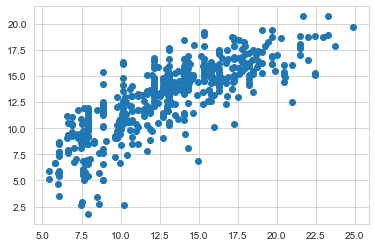

In [29]:
plt.scatter(y1_test,prediction)

In [33]:
model.coef = model.coef_.transpose()

In [35]:
pd.DataFrame(model.coef,X1.columns,columns=['co-efficient_value'])

,co-efficient_value
Loan.Amount,0.000216
FICO.Score,-0.089236


In [ ]:
##RMSE(Root Mean Squared Error)

In [38]:
from sklearn import metrics

In [40]:
MSE = metrics.mean_squared_error(y1_test,prediction)

In [41]:
RMSE = np.sqrt(MSE)

In [42]:
print(RMSE)

2.438129874613321
